In [1]:
import matplotlib.pyplot as plt, seaborn as sns
import numpy as np
import pandas as pd
import pandas as pd
import plotly.express as px
from itertools import combinations


In [4]:
# load the results from the CSV file and fill NaN values with 0
df = pd.read_csv('all_sweeps_results.csv', index_col='Scenario')
df = df.fillna(0)
df

,Optimization_Objective,Economic_System_Cost_GBP,Installed_AC_MW,Installed_hydroelectric_ph_MW,Installed_offwind_MW,Installed_onwind_MW,Fixed_Capacity_DSR_MW,Fixed_Capacity_load_shed_MW,Total_Generation_MWh,Gen_DSR_%,...,"Curtailment_('Generator', 'DSR')_MWh","Curtailment_('StorageUnit', 'DSR')_MWh","Curtailment_('Generator', 'load_shed')_MWh","Curtailment_('StorageUnit', 'load_shed')_MWh","Curtailment_('Generator', 'AC')_MWh","Curtailment_('StorageUnit', 'AC')_MWh",sweep_variable,primary_weight,Installed_battery_MW,Installed_tidal_MW
Scenario,,,,,,,,,,,,,,,,,,,,,
Economic_Baseline,4.550428e+11,3.392081e+10,242157.561670,71479.031221,88659.662520,98892.680306,8930.0,45000.0,3.535099e+08,0.161670,...,0,7.375137e+07,394200000.0,0,0,0,Economic_Baseline,0,0.000000e+00,0.000000
Sweep_ghg_w0,1.600148e+13,5.387530e+10,134675.872898,0.000000,109432.858059,4507.692048,8930.0,45000.0,3.600359e+08,0.014882,...,0,7.327475e+07,394200000.0,0,0,0,ghg,0,6.841138e+05,19433.224441
Sweep_ghg_w50,1.486451e+13,3.417059e+10,242633.324785,67604.384028,130932.856569,46223.798303,8930.0,45000.0,3.516079e+08,0.030477,...,0,7.332405e+07,394200000.0,0,0,0,ghg,50,0.000000e+00,0.000000
Sweep_ghg_w100,8.670048e+12,3.605941e+10,276595.040404,64302.389452,17666.090292,236673.933831,8930.0,45000.0,3.558968e+08,0.175641,...,0,7.380084e+07,394200000.0,0,0,0,ghg,100,0.000000e+00,0.000000
Sweep_biodiversity & noise_w0,1.813646e+13,4.323631e+10,165745.917026,39332.181328,103258.108572,11025.110260,8930.0,45000.0,3.583345e+08,0.024523,...,0,7.330762e+07,394200000.0,0,0,0,biodiversity & noise,0,2.725909e+05,25438.401580
Sweep_biodiversity & noise_w50,1.362870e+13,4.699291e+10,132054.685248,0.000000,143289.947003,15395.772637,8930.0,45000.0,3.583327e+08,0.019937,...,0,7.329118e+07,394200000.0,0,0,0,biodiversity & noise,50,5.681822e+05,0.000000
Sweep_biodiversity & noise_w100,8.044059e+12,4.901648e+10,180307.558569,0.000000,105489.966215,61264.793202,8930.0,45000.0,3.571717e+08,0.019603,...,0,7.329118e+07,394200000.0,0,0,0,biodiversity & noise,100,6.240263e+05,0.000000
Sweep_land use_w0,1.576952e+13,3.547570e+10,242349.118727,87788.553578,81841.125949,75154.626045,8930.0,45000.0,3.540544e+08,0.020178,...,0,7.329118e+07,394200000.0,0,0,0,land use,0,8.990695e+03,4494.192362
Sweep_land use_w50,1.548317e+13,4.834148e+10,148501.038167,0.000000,146942.183683,0.000000,8930.0,45000.0,3.594170e+08,0.019877,...,0,7.329118e+07,394200000.0,0,0,0,land use,50,5.748241e+05,4982.311894


Plot to see what the generation mix looks like

In [14]:
# Define the scenarios to plot for the extreme (w100) cases.
scenarios_to_plot_w100 = [
    'Economic_Baseline',
    'Sweep_ghg_w100',
    'Sweep_biodiversity & noise_w100',
    'Sweep_land use_w100',
    'Sweep_grid upgrades_w100',
    'Sweep_reliability_w100'
]

# Select the data for the plot using the index
gen_mix_cols = [col for col in df.columns if col.startswith('Gen_') and col.endswith('%')]
plot_df_w100 = df.loc[scenarios_to_plot_w100, gen_mix_cols].copy()

# Clean the column names for a tidy legend
cleaned_cols = {
    col: col.replace('Gen_', '').replace('_', ' ').replace(' %', '').title()
    for col in gen_mix_cols
}
plot_df_w100.rename(columns=cleaned_cols, inplace=True)

# Define the new, more descriptive scenario labels
new_scenario_labels = {
    'Economic_Baseline': 'Economic Baseline',
    'Sweep_ghg_w100': 'GHG Reduction',
    'Sweep_biodiversity & noise_w100': 'Biodiversity & Noise',
    'Sweep_land use_w100': 'Land Use',
    'Sweep_grid upgrades_w100': 'Grid Upgrades',
    'Sweep_reliability_w100': 'Reliability'
}
plot_df_w100.rename(index=new_scenario_labels, inplace=True)

# Create the stacked bar chart
fig_w100 = px.bar(
    plot_df_w100,
    x=plot_df_w100.index,
    y=plot_df_w100.columns,
    #title='UK Net-Zero Pathways: Generation Mix Under Diverse Policy Goals',
    labels={'value': 'Generation Share (%)', 'index': 'Policy Priority'}
)

# Final layout updates
fig_w100.update_layout(
    barmode='stack',
    xaxis_title='Policy Priority',  # Explicitly set x-axis title
    yaxis_title='Generation Share (%)',
    legend_title='Technology',
    xaxis={'categoryorder': 'array', 'categoryarray': [new_scenario_labels[s] for s in scenarios_to_plot_w100]},
    title_x=0.5
)
fig_w100.update_xaxes(tickangle=45)

fig_w100.show()

Plot correlation matrix for key columns

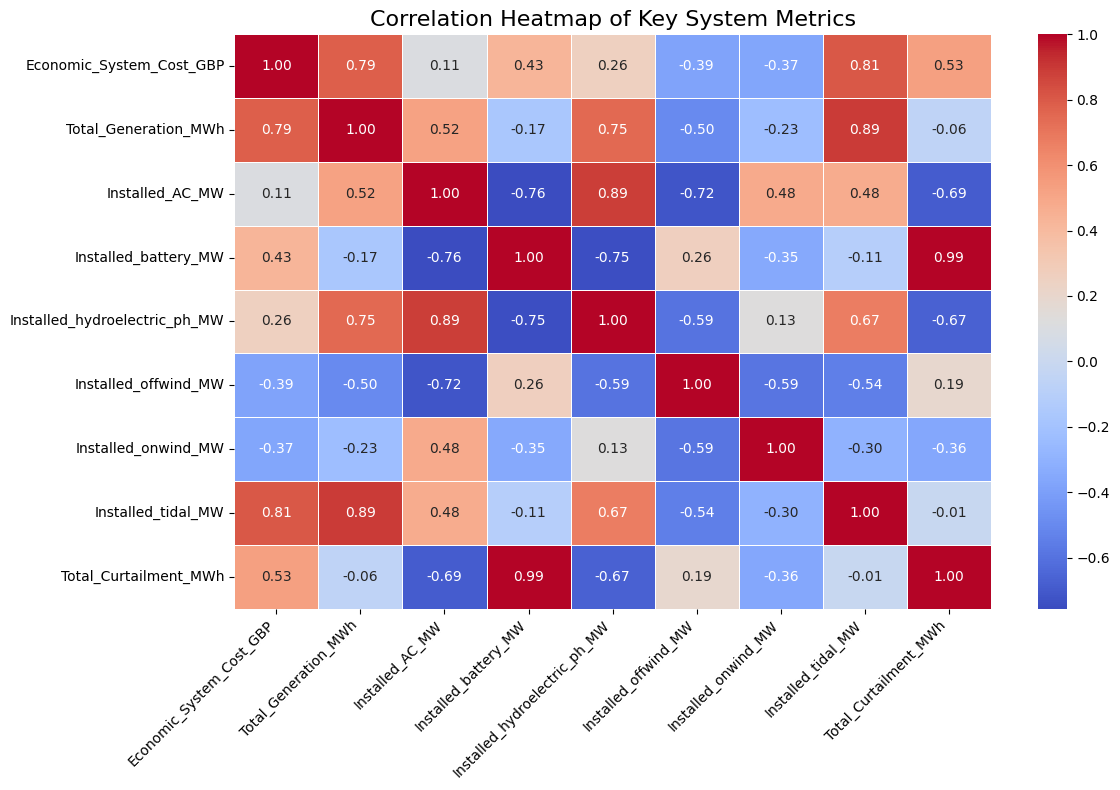

In [6]:


# Select key numeric columns for the correlation analysis.
# You can customize this list to explore other variables.
correlation_cols = [
    'Economic_System_Cost_GBP',
    'Total_Generation_MWh',
    'Installed_AC_MW',
    'Installed_battery_MW',
    'Installed_hydroelectric_ph_MW',
    'Installed_load_shed_MW',
    'Installed_offwind_MW',
    'Installed_onwind_MW',
    'Installed_tidal_MW',
    'Total_Curtailment_MWh'
]

# Filter out any columns that may not exist in your specific dataframe
existing_corr_cols = [col for col in correlation_cols if col in df.columns]

# Create a dataframe for the correlation matrix
corr_df = df[existing_corr_cols]
correlation_matrix = corr_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Key System Metrics', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
# To save the figure to a file, uncomment the following line:
# plt.savefig('correlation_heatmap.png')
plt.show()

The script below calculates a "normalized curtailment" metric to fairly compare the operational inefficiency of different technologies. Instead of looking at raw curtailment totals, it measures how much energy is wasted per unit of installed capacity (MWh / MW).

In [15]:


# --- Overall Normalized Curtailment (Averaged Across Extreme Scenarios) ---
 
scenarios_to_plot_w100 = [
    'Economic_Baseline',
    'Sweep_ghg_w100',
    'Sweep_biodiversity & noise_w100',
    'Sweep_land use_w100',
    'Sweep_grid upgrades_w100',
    'Sweep_reliability_w100'
]
# Filter for only those scenarios that actually exist in the DataFrame to prevent errors.
scenarios_in_df = [s for s in scenarios_to_plot_w100 if s in df.index]

if scenarios_in_df:
    #  technology carriers to be included in the analysis.
    techs = {'onwind', 'offwind', 'tidal'}
    # A dictionary to store the calculated normalized curtailment for each scenario.
    normalized_curtailment_data = {}

    # Loop through each of the selected extreme scenarios.
    for scenario in scenarios_in_df:
        # A temporary dictionary to hold the results for the current scenario.
        norm_curtailment = {}
        # Loop through each technology to calculate its normalized curtailment.
        for tech in techs:
            
            # --- Find the Correct Curtailment and Capacity Columns ---
            cur_col = f"Curtailment_('Generator', '{tech}')_MWh"
            #if cur_col not in df.columns:
                #cur_col = f"Curtailment_('StorageUnit', '{tech}')_MWh"
            
            cap_col = f"Installed_{tech}_MW"
            #if cap_col not in df.columns:
                #cap_col = f"Fixed_Capacity_{tech}_MW"

            # --- Calculate the Normalized Value ---
            if cur_col in df.columns and cap_col in df.columns:
                curtailment_mwh = df.loc[scenario, cur_col]
                capacity_mw = df.loc[scenario, cap_col]
                
                if capacity_mw > 0:
                    norm_val = curtailment_mwh / capacity_mw
                else:
                    norm_val = 0
                
                tech_label = tech.replace('_', ' ').title()
                norm_curtailment[tech_label] = norm_val
        
        normalized_curtailment_data[scenario] = norm_curtailment

    # Convert the dictionary of results into a pandas DataFrame for easy analysis.
    plot_df = pd.DataFrame(normalized_curtailment_data).T

    # --- Generate the Final Interactive Plot ---
    if not plot_df.empty:
        # Calculate the average (mean) normalized curtailment for each technology.
        overall_avg = plot_df.mean()
        # Sort the results in descending order for a more readable bar chart.
        overall_avg.sort_values(ascending=False, inplace=True)
        
        # --- Create the interactive bar chart with Plotly Express ---
        fig = px.bar(
            x=overall_avg.index,
            y=overall_avg.values,
            labels={
                'x': 'Technology',
                'y': 'Average Curtailment per Unit of Capacity (MWh / MW)'
            },
            #title='Overall Normalized Curtailment (Averaged Across Extreme Scenarios)'
        )
        
        # Update layout for a cleaner look
        fig.update_layout(
            xaxis_title='Technology',
            yaxis_title='Average Curtailment (MWh / MW)',
            title_x=0.5 # Center the title
        )
        
        # Show the interactive plot
        fig.show()
        
    else:
        print("Could not generate normalized curtailment data. Check column names.")
else:
    print("None of the specified scenarios were found in the DataFrame to average.")


The below script performs a detailed analysis of the different power system scenarios by comparing them against each other. It calculates the change in key metrics like economic cost, renewable generation, grid capacity, and storage capacity between scenarios. The analysis is broken down into three parts:

Part 1: Policy vs. Baseline: Compares each policy-driven scenario to the economic baseline scenario to show the cost and infrastructure trade-offs.

Part 2: Policy vs. Policy: Compares every policy scenario against every other policy scenario to highlight how different policy choices affect the system relative to each other.

Part 3: Incremental Analysis: Examines the changes within each individual policy sweep (e.g., from a 0% penalty to a 50% penalty, and then from a 50% to a 100% penalty) to show the effect of increasing policy stringency.

In [ ]:


# ---  Analysis Function ---
def get_policy_shift_data(reference_name, policy_name, reference_scenario, policy_scenario):
    """
    Compares two scenarios and returns a dictionary of the calculated differences,
    with an explicit breakdown between grid and storage infrastructure.
    """
    ref = reference_scenario
    pol = policy_scenario
    
    # --- Calculate the differences in key metrics ---
    cost_delta = pol['Economic_System_Cost_GBP'] - ref['Economic_System_Cost_GBP']
    curtailment_delta = pol['Total_Curtailment_MWh'] - ref['Total_Curtailment_MWh']
    
    # --- Explicitly separate Grid and Storage infrastructure ---
    
    # Calculate the change in Grid (AC Links) capacity
    ref_grid_gw = ref.get('Installed_AC_MW', 0) / 1e3
    pol_grid_gw = pol.get('Installed_AC_MW', 0) / 1e3
    grid_delta_gw = pol_grid_gw - ref_grid_gw
    
    # Calculate the change in total Storage and Flexibility capacity
    ref_storage_gw = (ref.get('Installed_battery_MW', 0) + 
                      ref.get('Installed_hydroelectric_ph_MW', 0) + 
                      ref.get('Fixed_Capacity_DSR_MW', 0)) / 1e3
                      
    pol_storage_gw = (pol.get('Installed_battery_MW', 0) + 
                      pol.get('Installed_hydroelectric_ph_MW', 0) + 
                      pol.get('Fixed_Capacity_DSR_MW', 0)) / 1e3
                      
    storage_delta_gw = pol_storage_gw - ref_storage_gw

    # --- Calculate the change in installed renewable generation capacity ---
    onshore_wind_delta = pol.get('Installed_onwind_MW', 0) - ref.get('Installed_onwind_MW', 0)
    offshore_wind_delta = pol.get('Installed_offwind_MW', 0) - ref.get('Installed_offwind_MW', 0)
    tidal_delta = pol.get('Installed_tidal_MW', 0) - ref.get('Installed_tidal_MW', 0)

    # --- Return all calculated deltas in a dictionary ---
    return {
        'Reference_Scenario': reference_name,
        'Policy_Scenario': policy_name,
        'Cost_Delta_Billions_GBP': cost_delta / 1e9,
        'Curtailment_Delta_TWh': curtailment_delta / 1e6,
        'Grid_Delta_GW': grid_delta_gw,
        'Storage_Delta_GW': storage_delta_gw,
        'Onshore_Wind_Delta_GW': onshore_wind_delta / 1e3,
        'Offshore_Wind_Delta_GW': offshore_wind_delta / 1e3,
        'Tidal_Delta_GW': tidal_delta / 1e3
    }

# --- Initialize empty lists to store the results from each part ---
part1_results_list = []
part2_results_list = []
part3_results_list = []

# --- Perform the Full Analysis and Store Results ---
try:
    # --- PART 1: Compare all policies to the Economic Baseline ---
    scenarios_to_analyze = [s for s in ['Sweep_ghg_w100', 'Sweep_biodiversity & noise_w100', 'Sweep_land use_w100', 'Sweep_grid upgrades_w100', 'Sweep_reliability_w100'] if s in df.index]
    baseline_scenario = df.loc['Economic_Baseline']
    for scenario_name in scenarios_to_analyze:
        policy_scenario = df.loc[scenario_name]
        data = get_policy_shift_data("Economic_Baseline", scenario_name, baseline_scenario, policy_scenario)
        part1_results_list.append(data)

    # --- PART 2: Compare every policy against every other policy ---
    scenario_pairs = list(combinations(scenarios_to_analyze, 2))
    for ref_scenario_name, policy_scenario_name in scenario_pairs:
        ref_scenario = df.loc[ref_scenario_name]
        policy_scenario = df.loc[policy_scenario_name]
        data = get_policy_shift_data(ref_scenario_name, policy_scenario_name, ref_scenario, policy_scenario)
        part2_results_list.append(data)

    # --- PART 3: Incremental Analysis Within Each Policy Sweep ---
    policy_sweeps = ['Sweep_ghg', 'Sweep_biodiversity & noise', 'Sweep_land use', 'Sweep_grid upgrades', 'Sweep_reliability']
    scenarios_by_weight = {0: '{}_w0', 50: '{}_w50', 100: '{}_w100'}
    
    for sweep_base_name in policy_sweeps:
        # --- 0% to 50% ---
        ref_name_50 = scenarios_by_weight[0].format(sweep_base_name)
        pol_name_50 = scenarios_by_weight[50].format(sweep_base_name)
        if ref_name_50 in df.index and pol_name_50 in df.index:
            data = get_policy_shift_data(ref_name_50, pol_name_50, df.loc[ref_name_50], df.loc[pol_name_50])
            part3_results_list.append(data)
            
        # --- 50% to 100% ---
        ref_name_100 = scenarios_by_weight[50].format(sweep_base_name)
        pol_name_100 = scenarios_by_weight[100].format(sweep_base_name)
        if ref_name_100 in df.index and pol_name_100 in df.index:
            data = get_policy_shift_data(ref_name_100, pol_name_100, df.loc[ref_name_100], df.loc[pol_name_100])
            part3_results_list.append(data)

except KeyError as e:
    print(f"\nError: A required scenario was not found in the results: {e}")

# --- Convert the lists of results into pandas DataFrames ---
df_part1_analysis = pd.DataFrame(part1_results_list)
df_part2_analysis = pd.DataFrame(part2_results_list)
df_part3_analysis = pd.DataFrame(part3_results_list)

# --- Display the results ---
print("\n\n--- Analysis Results: Part 1 (Policy vs. Economic Baseline) ---")
display(df_part1_analysis)

print("\n\n--- Analysis Results: Part 2 (Policy vs. Policy) ---")
display(df_part2_analysis)

print("\n\n--- Analysis Results: Part 3 (Incremental Changes) ---")
display(df_part3_analysis)

# --- Optional: Save the analysis results to CSV files ---
df_part1_analysis.to_csv('analysis_part1_results.csv', index=False)
df_part2_analysis.to_csv('analysis_part2_results.csv', index=False)
df_part3_analysis.to_csv('analysis_part3_results.csv', index=False)
# print("\nAnalysis results saved to CSV files.")




--- Analysis Results: Part 1 (Policy vs. Economic Baseline) ---


,Reference_Scenario,Policy_Scenario,Cost_Delta_Billions_GBP,Curtailment_Delta_TWh,Grid_Delta_GW,Storage_Delta_GW,Onshore_Wind_Delta_GW,Offshore_Wind_Delta_GW,Tidal_Delta_GW
0,Economic_Baseline,Sweep_ghg_w100,2.138602,35.923655,34.437479,-7.176642,137.781254,-70.993572,0.000000
1,Economic_Baseline,Sweep_biodiversity & noise_w100,15.095666,4792.655686,-61.850003,552.547236,-37.627887,16.830304,0.000000
2,Economic_Baseline,Sweep_land use_w100,14.492235,3154.249551,-59.327477,364.712149,-98.892680,55.631577,23.587471
3,Economic_Baseline,Sweep_grid upgrades_w100,35.533802,7927.899069,-50.489374,929.524002,-20.131263,-61.519106,33.047739
4,Economic_Baseline,Sweep_reliability_w100,46.018349,1061.590891,92.620679,153.720154,-98.892680,-70.457874,94.414584




--- Analysis Results: Part 2 (Policy vs. Policy) ---


,Reference_Scenario,Policy_Scenario,Cost_Delta_Billions_GBP,Curtailment_Delta_TWh,Grid_Delta_GW,Storage_Delta_GW,Onshore_Wind_Delta_GW,Offshore_Wind_Delta_GW,Tidal_Delta_GW
0,Sweep_ghg_w100,Sweep_biodiversity & noise_w100,12.957063,4756.732031,-96.287482,559.723877,-175.409141,87.823876,0.000000
1,Sweep_ghg_w100,Sweep_land use_w100,12.353632,3118.325896,-93.764956,371.888790,-236.673934,126.625149,23.587471
2,Sweep_ghg_w100,Sweep_grid upgrades_w100,33.395199,7891.975414,-84.926852,936.700644,-157.912516,9.474466,33.047739
3,Sweep_ghg_w100,Sweep_reliability_w100,43.879747,1025.667236,58.183200,160.896796,-236.673934,0.535698,94.414584
4,Sweep_biodiversity & noise_w100,Sweep_land use_w100,-0.603431,-1638.406134,2.522526,-187.835087,-61.264793,38.801273,23.587471
5,Sweep_biodiversity & noise_w100,Sweep_grid upgrades_w100,20.438136,3135.243383,11.360629,376.976766,17.496624,-78.349409,33.047739
6,Sweep_biodiversity & noise_w100,Sweep_reliability_w100,30.922684,-3731.064795,154.470682,-398.827082,-61.264793,-87.288178,94.414584
7,Sweep_land use_w100,Sweep_grid upgrades_w100,21.041567,4773.649518,8.838104,564.811853,78.761418,-117.150683,9.460268
8,Sweep_land use_w100,Sweep_reliability_w100,31.526115,-2092.658660,151.948157,-210.991995,0.000000,-126.089451,70.827113
9,Sweep_grid upgrades_w100,Sweep_reliability_w100,10.484548,-6866.308178,143.110053,-775.803848,-78.761418,-8.938768,61.366845




--- Analysis Results: Part 3 (Incremental Changes) ---


,Reference_Scenario,Policy_Scenario,Cost_Delta_Billions_GBP,Curtailment_Delta_TWh,Grid_Delta_GW,Storage_Delta_GW,Onshore_Wind_Delta_GW,Offshore_Wind_Delta_GW,Tidal_Delta_GW
0,Sweep_ghg_w0,Sweep_ghg_w50,-19.704703,-5230.558579,107.957452,-616.509390,41.716106,21.499999,-19.433224
1,Sweep_ghg_w50,Sweep_ghg_w100,1.888820,64.470231,33.961716,-3.301995,190.450136,-113.266766,0.000000
2,Sweep_biodiversity & noise_w0,Sweep_biodiversity & noise_w50,3.756600,2341.123348,-33.691232,256.259118,4.370662,40.031838,-25.438402
3,Sweep_biodiversity & noise_w50,Sweep_biodiversity & noise_w100,2.023567,497.427926,48.252873,55.844101,45.869021,-37.799981,0.000000
4,Sweep_land use_w0,Sweep_land use_w50,12.865783,4195.950545,-93.848081,478.044875,-75.154626,65.101058,0.488120
5,Sweep_land use_w50,Sweep_land use_w100,0.071564,-1182.046826,34.329046,-138.632944,0.000000,-2.650944,18.605159
6,Sweep_grid upgrades_w0,Sweep_grid upgrades_w50,5.812631,906.190743,5.933647,116.097655,26.203806,-65.104168,18.731028
7,Sweep_grid upgrades_w50,Sweep_grid upgrades_w100,16.201877,2766.201945,47.307134,321.634501,52.557611,-65.514793,14.119001
8,Sweep_reliability_w0,Sweep_reliability_w50,-2.760048,-2650.085888,52.752003,-287.572977,-3.742247,-53.721336,29.325233
9,Sweep_reliability_w50,Sweep_reliability_w100,35.686176,-574.791693,147.371139,-54.454020,-11.025110,-71.679480,64.933277


Plot to see the change in economic cost for different scenarios relative to the economic baseline

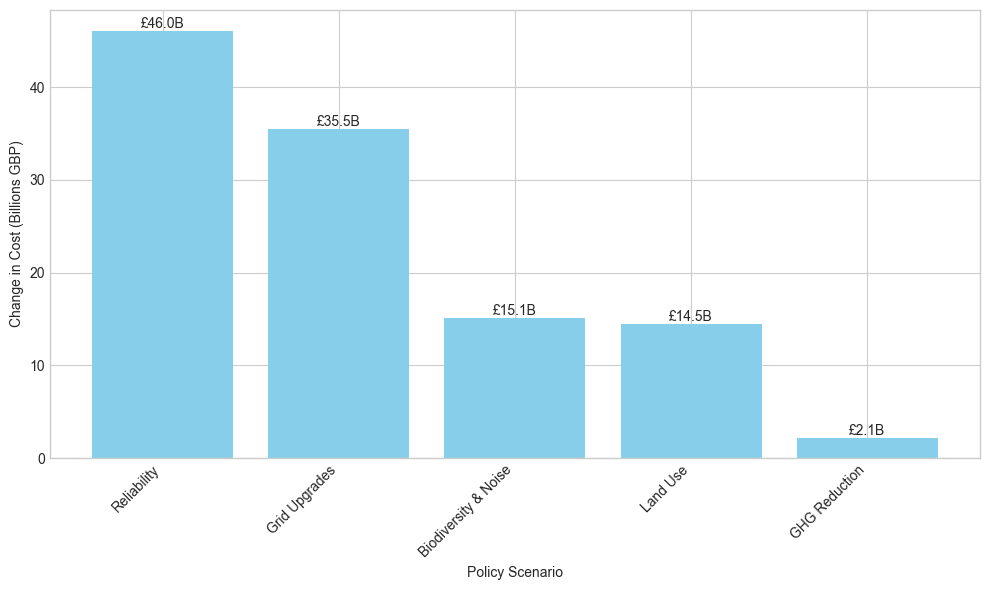

In [16]:


# Sort the data by cost delta in descending order
df_plot = df_part1_analysis.sort_values(by='Cost_Delta_Billions_GBP', ascending=False).copy() 

# Create a mapping for more readable policy scenario names
scenario_mapping = {
    'Sweep_reliability_w100': 'Reliability',
    'Sweep_grid upgrades_w100': 'Grid Upgrades',
    'Sweep_biodiversity & noise_w100': 'Biodiversity & Noise',
    'Sweep_land use_w100': 'Land Use',
    'Sweep_ghg_w100': 'GHG Reduction'
}

# Apply the mapping to the 'Policy_Scenario' column
df_plot['Policy_Scenario'] = df_plot['Policy_Scenario'].map(scenario_mapping)

# --- 2. Create the Plot ---
# Create the figure and axes objects for the plot with a specific size
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart
bars = ax.bar(df_plot['Policy_Scenario'], df_plot['Cost_Delta_Billions_GBP'], color='skyblue')

# Add labels to the top of each bar
for bar in bars:
    height = bar.get_height()
    # Only add a label if the height is positive
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2, # X-position for the text
            height,                             # Y-position for the text (at the top of the bar)
            f'£{height:.1f}B',                    # The text to display, formatted to one decimal place
            ha='center',                        # Horizontal alignment: centered
            va='bottom',                        # Vertical alignment: bottom (places text just above the bar)
            fontsize=10
        )

# Add labels and a title to the plot
ax.set_xlabel('Policy Scenario')
ax.set_ylabel('Change in Cost (Billions GBP)')
#ax.set_title('Change in Cost by Policy Scenario (relative to Economic Baseline)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent labels from being cut off
plt.tight_layout()

# Save the updated plot as a PNG file
plt.savefig('images/cost_delta_bar_chart_improved.png')

# Display the plot
plt.show()


Plot to show how the storage strategy changes as the weight increases

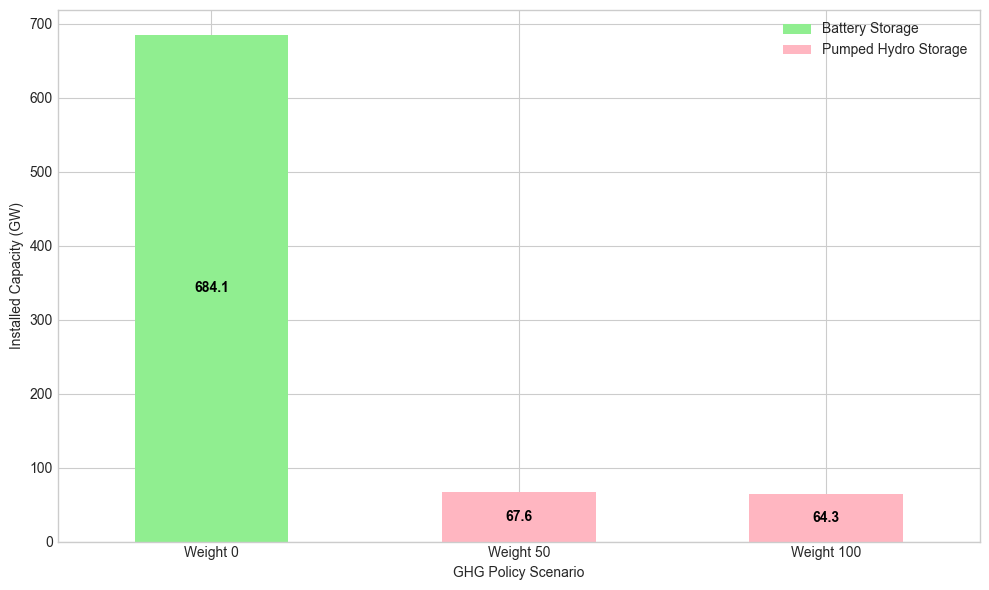

In [ ]:


# Filter the dataframe for the GHG-focused scenarios
df_ghg = df[df['sweep_variable'] == 'ghg'].copy()

# Create a more readable version of the scenario names
scenario_mapping = {
    'Sweep_ghg_w0': 'Weight 0',
    'Sweep_ghg_w50': 'Weight 50',
    'Sweep_ghg_w100': 'Weight 100'
}

# Apply the mapping to the index
df_ghg.index = df_ghg.index.map(scenario_mapping)

# Convert MW to GW for better readability
df_ghg['Installed_battery_GW'] = df_ghg['Installed_battery_MW'] / 1000
df_ghg['Installed_hydroelectric_ph_GW'] = df_ghg['Installed_hydroelectric_ph_MW'] / 1000

# plotting code
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['lightgreen', 'lightpink']

df_ghg[['Installed_battery_GW', 'Installed_hydroelectric_ph_GW']].plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=colors
)

ax.set_ylabel('Installed Capacity (GW)')
ax.set_xlabel('GHG Policy Scenario')
ax.legend(['Battery Storage', 'Pumped Hydro Storage'])

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            text_color = 'white' if bar.get_facecolor()[0] > 0.5 and bar.get_facecolor()[1] < 0.5 else 'black'
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}',
                ha='center',
                va='center',
                color=text_color,
                fontsize=10,
                weight='bold'
            )

plt.xticks(rotation=0)
plt.tight_layout()

plt.savefig('images/ghg_storage_reversal_plot.png', dpi=300, bbox_inches='tight')

Plot to show how going from 0 to moderate (50) weight affects the economic cost .

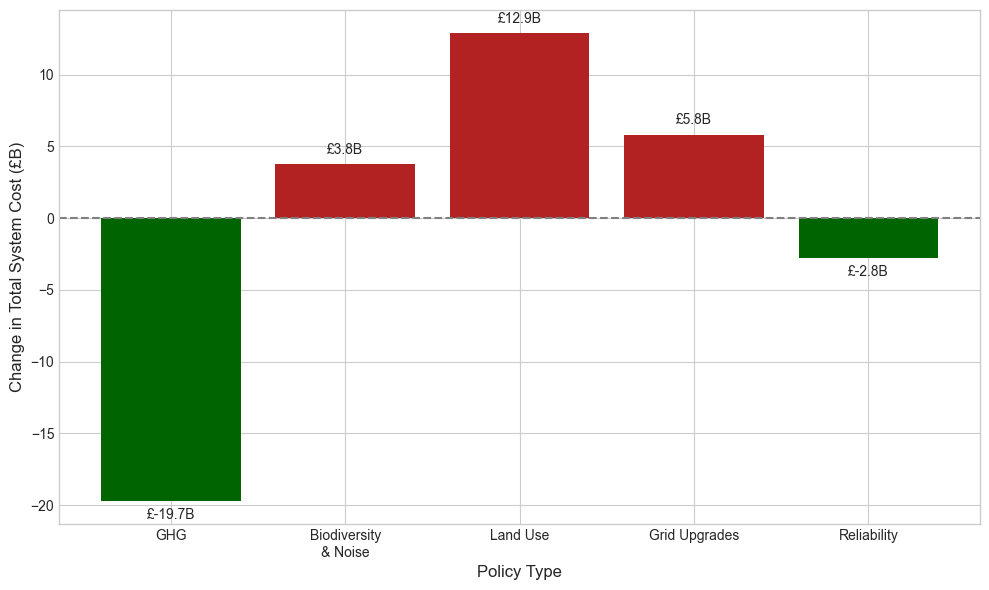

In [19]:


# Filter for the transitions from 0% to 50% weighting
# These are the rows where the Policy_Scenario ends in 'w50'
df_ghg_transition = df_part3_analysis[df_part3_analysis['Policy_Scenario'].str.contains('w50')].copy()

# Add a readable name for the policy type
# This is done by splitting the string and taking the second element
df_ghg_transition['Policy_Type'] = df_ghg_transition['Policy_Scenario'].str.split('_').str[1]
# Replace the policy type names for clearer plot labels
df_ghg_transition['Policy_Type'] = df_ghg_transition['Policy_Type'].replace({'ghg': 'GHG', 'biodiversity & noise': 'Biodiversity\n& Noise', 'land use': 'Land Use', 'grid upgrades': 'Grid Upgrades', 'reliability': 'Reliability'})

# --- Create the plot using Matplotlib ---
# Set the style and size for better readability
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))

# Define the data to plot
policies = df_ghg_transition['Policy_Type']
cost_deltas = df_ghg_transition['Cost_Delta_Billions_GBP']

# Define the colors based on whether the cost is a reduction or increase
colors = ['darkgreen' if delta < 0 else 'firebrick' for delta in cost_deltas]

# Create the bar chart
bars = plt.bar(policies, cost_deltas, color=colors)

# Add a horizontal dashed line at y=0 for the baseline
plt.axhline(0, color='grey', linestyle='--', linewidth=1.5)

# Add titles and labels for clarity
#plt.title('Cost Impact of Moderate Policy Implementation (0% to 50% Weighting)', fontsize=16)
plt.xlabel('Policy Type', fontsize=12)
plt.ylabel('Change in Total System Cost (£B)', fontsize=12)


# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2, 
        yval + np.sign(yval) * 0.5, # Position the label slightly above/below the bar
        f'£{yval:.1f}B', 
        ha='center', 
        va='bottom' if yval >= 0 else 'top',
        fontsize=10
    )

# Ensure the layout is tight to prevent labels from being cut off
plt.tight_layout()

# Save the plot
plt.savefig('images/policy_cost_impact_matplotlib.png')

# Display the plot
plt.show()
